In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Importing the csv data and exploring the data structure
df = pd.read_csv("superstore_data.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2021-138688,6/12/2021,6/16/2021,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2020-108966,10/11/2020,10/18/2020,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2020-108966,10/11/2020,10/18/2020,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


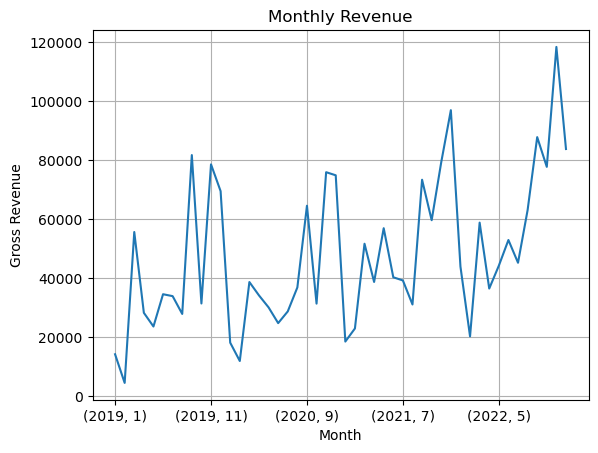

<Figure size 1000x800 with 0 Axes>

In [2]:
# Converting order dates to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Order Date' column to datetime format

# Extract month and year from the 'date' column
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

# Analyzing company sales over time
monthly_sales = df.groupby(['order_year', 'order_month'])['Sales'].sum()

# Visualizing the data
monthly_sales.plot(x=['order_year', 'order_month'],y="Sales")
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.figure(figsize=(10, 8))
plt.show()

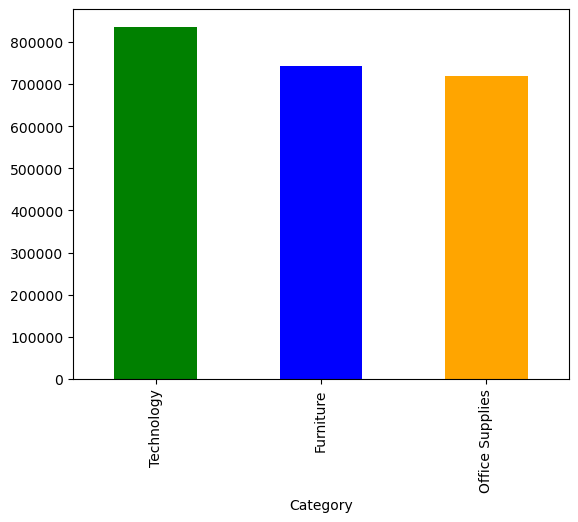

In [3]:
# Analyzing company sales over time
cat_sales = df.groupby('Category')['Sales'].sum()
cat_sales = cat_sales.sort_values(ascending = False)

#Assigning colors
colors=['green','blue','orange']

# Visualizing the data
cat_sales.plot(x='Category',y='Sales', kind = 'bar', color = colors)
plt.show()

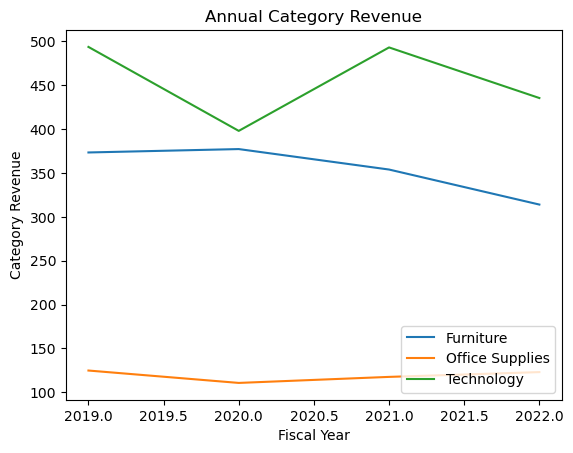

Category     Furniture  Office Supplies  Technology
order_year                                         
2019        373.379699       124.713568  493.741501
2020        377.252737       110.582968  397.997088
2021        353.917146       117.458481  493.168148
2022        313.975611       122.925662  435.466043


In [4]:
# Analyzing Annual Category sales YoY
annual_cat_sales = df.pivot_table(values='Sales', index='order_year', columns='Category', fill_value=0)

# Analyzing Sub-Category sales over time
annual_sub_cat_sales = df.groupby(['order_year','Category','Sub-Category'])['Sales'].sum()
# print(annual_sub_cat_sales)

# Visualizing the data
annual_cat_sales.plot()

plt.title('Annual Category Revenue')
plt.xlabel("Fiscal Year")
plt.ylabel("Category Revenue")
plt.legend(loc = 'lower right')
plt.show()

# Show data under chart as well
print(annual_cat_sales)